## Exercise 07 : Heatmap ##

## Imports ##

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Task #
В этом упражнении выясним, есть ли разные паттерны поведения пользователей между разными днями недели и разными часами.

* анализировать только пользователей, не администраторов
* вы можете выбрать любую цветовую палитру для обеих графиков, которые придётся построить
* используйте таблицу checker для запросов
* используйте абсолютные значения коммитов, а не средние
* сортируйте DataFrame по общему количеству коммитов пользователя
* в конце Jupyter Notebook создайте markdown‑ячейку и вставьте вопросы (ответьте, глядя только на графики):
  * «Какой пользователь сделал больше всего коммитов во вторник?» Ответ: user_*.
  * «Какой пользователь сделал больше всего коммитов в четверг?» Ответ: user_*.
  * «В какой день недели пользователям не нравится делать много коммитов?» Ответ, например: Пн.
  * «Какой пользователь в какой час сделал наибольшее число коммитов?» Ответ, например: user_1, 15

Сделайте всё необходимое, чтобы создать два графика, похожих на Readme.

In [ ]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [ ]:
df = pd.read_sql('SELECT * FROM checker WHERE uid LIKE "user%"', conn, parse_dates=['timestamp']) 
df['day_of_week'] = df['timestamp'].dt.weekday
df['name_of_day'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date
df['type'] = df['day_of_week'].apply(lambda x: 'working_day' if x in range(0, 5) else 'weekend')
daily_counts = df.groupby(['uid', 'day_of_week', 'name_of_day', 'date', 'type', 'hour']).size().reset_index(name='commit_count')
daily_counts = daily_counts.groupby(['uid', 'name_of_day', 'hour'])['commit_count'].sum().reset_index()
daily_counts.sort_values(by='commit_count')
daily_counts.head()

,uid,name_of_day,hour,commit_count
0,user_0,Monday,17,3
1,user_1,Saturday,19,1
2,user_1,Sunday,16,1
3,user_1,Sunday,17,8
4,user_1,Sunday,19,12


C:\Users\vtsab\AppData\Local\Temp\ipykernel_47232\1569283762.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table1 = daily_counts.pivot_table(index='name_of_day', columns='uid', values='commit_count', aggfunc='sum', fill_value=0)


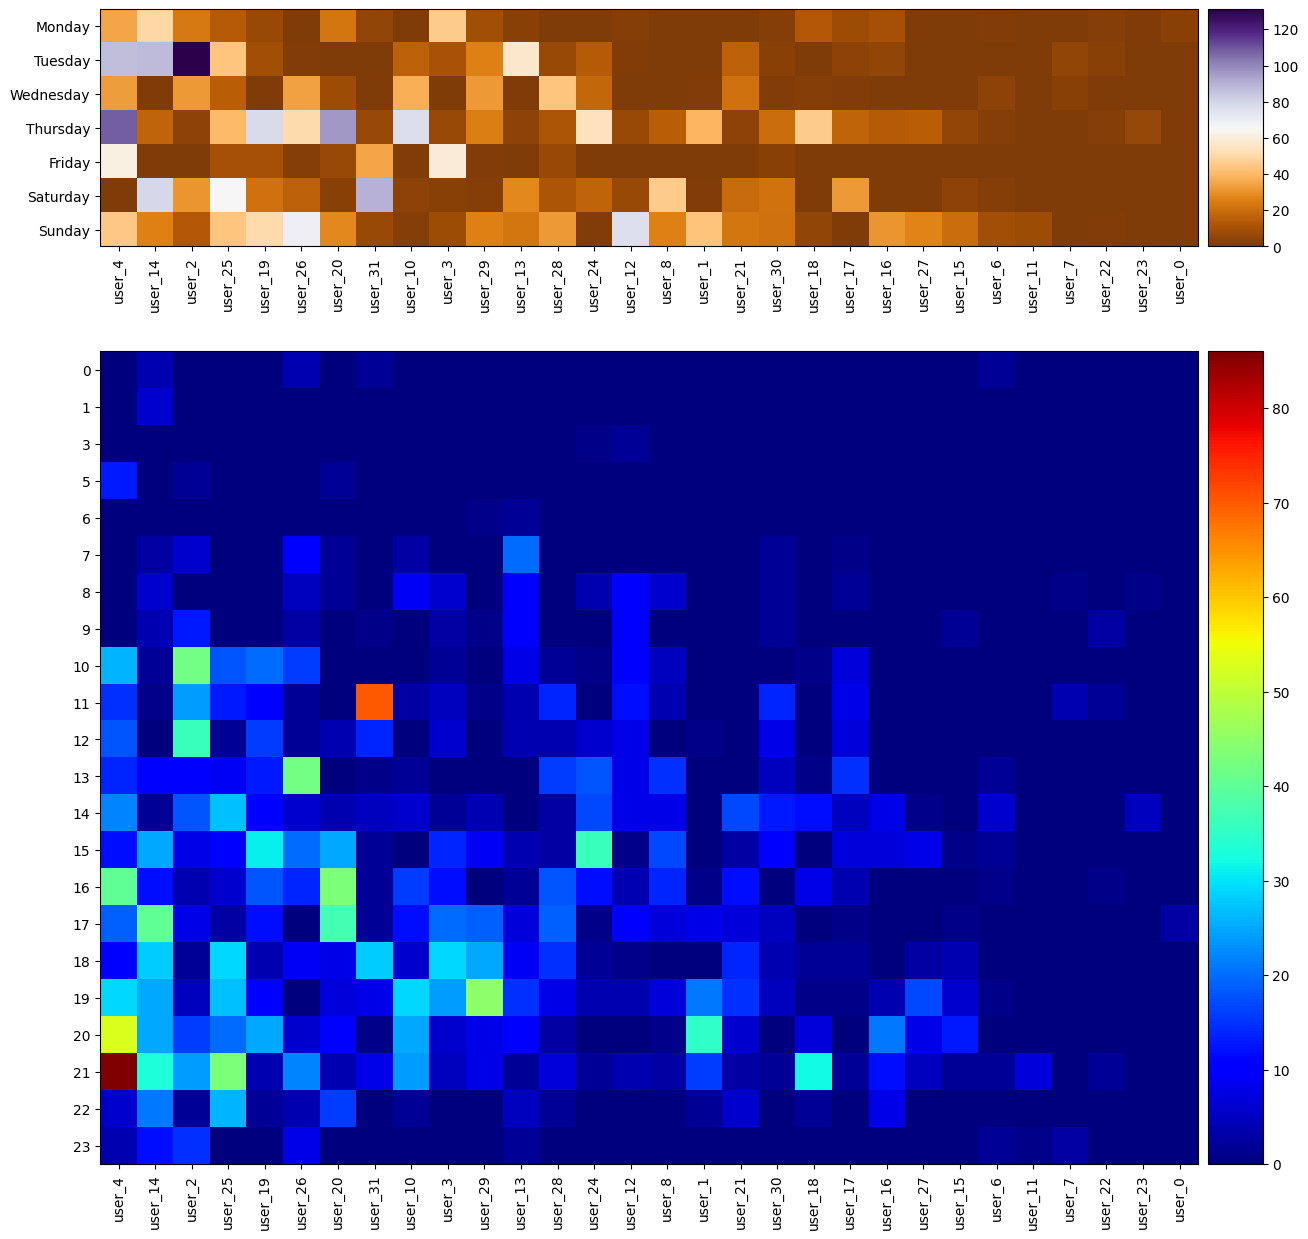

In [ ]:
pivot_table = daily_counts.pivot_table(index='hour', columns='uid', values='commit_count', aggfunc='sum', fill_value=0)
pivot_table1 = daily_counts.pivot_table(index='name_of_day', columns='uid', values='commit_count', aggfunc='sum', fill_value=0)

# Сортируем 
sum_counts_1 = pivot_table.sum(axis=0)
sorted_uids_1 = sum_counts_1.sort_values(ascending=False).index
pivot_table = pivot_table[sorted_uids_1]

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts['name_of_day'] = pd.Categorical(daily_counts['name_of_day'], categories=days_order, ordered=True)
pivot_table1 = daily_counts.pivot_table(index='name_of_day', columns='uid', values='commit_count', aggfunc='sum', fill_value=0)
sum_counts_2 = pivot_table1.sum(axis=0)
sorted_uids_2 = sum_counts_2.sort_values(ascending=False).index
pivot_table1 = pivot_table1[sorted_uids_2]

# Форматируем 
data = pivot_table.values
data1 = pivot_table1.values

# Рисуем
fig, (ax1, ax) = plt.subplots(2, figsize=(15, 15), gridspec_kw={'height_ratios': [7, 24]})

# Раз
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="5%", pad=0.1)

ax1.set_xticks(range(len(pivot_table1.columns)))
ax1.set_xticklabels(pivot_table1.columns)
ax1.set_yticks(range(len(pivot_table1.index)))
ax1.set_yticklabels(pivot_table1.index)

im = ax1.imshow(data1, aspect='auto', cmap='PuOr')
plt.setp(ax1.get_xticklabels(), rotation=90)  # Поворот меток
plt.colorbar(im, cax=cax1,)

# Два 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

ax.set_xticks(range(len(pivot_table.columns)))
ax.set_xticklabels(pivot_table.columns)
ax.set_yticks(range(len(pivot_table.index)))
ax.set_yticklabels(pivot_table.index)

im = ax.imshow(data, aspect='auto', cmap='jet')
plt.setp(ax.get_xticklabels(), rotation=90)  # Поворот меток
plt.colorbar(im, cax=cax,)

# Выводим
plt.show()

In [ ]:
conn.close()

  * «Какой пользователь сделал больше всего коммитов во вторник?» Ответ: user_2
  * «Какой пользователь сделал больше всего коммитов в четверг?» Ответ: user_4
  * «В какой день недели пользователям не нравится делать много коммитов?» Ответ: Пн, Пт.
  * «Какой пользователь в какой час сделал наибольшее число коммитов?» Ответ, например: user_4, 21